### Введение

Наше задание: помочь маркетологам оптимизировать маркетинговые затраты.
У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши
- выгрузка всех заказов за этот период
- статистика рекламных расходов

Мы должны изучить:
- как люди пользуются продуктом
- когда они начинают покупать
- сколько денег приносит каждый клиент
- когда клиент окупается

  ### Содержание:
  <ul>
    <li><a href="#step1">Шаг 1.  Открытие файлов с данными, изучение общей информации и подготовка данных</a>
  </ul>
    <ul>
    <li><a href="#step2">Шаг 2.  Построение отчетов и расчет метрик </a>
    <ul>
        <li><a href="#step2.1">2.1. Исследование продукта </a>
        <li><a href="#step2.2">2.2. Исследование продаж </a>
        <li><a href="#step2.3">2.3. Маркетинговые исследования </a>
        </ul>    
  </ul>
  <ul>
  <li><a href="#step3">Шаг 3. Общий вывод и рекомендации </a>
  </ul>
</nav>

### Шаг 1.  Открытие файлов с данными, изучение общей информации и подготовка данных <a id='step1'></a>

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("summer")
#прочитаем входящие файлы и запишем данные в переменные
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

def intro(data):
    '''Функция для автоматизации вывода датафрейма и информации о нем'''
    #выведем на экран полученный результат
    display(data)
    #выведем информацию о полученном датафрейме
    data.info()

Рассмотрим датафрейм с информацией о посещениях сайта visits.

In [2]:
#применим к переменной visits функцию intro
intro(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В столбцах датафрейма заключены следующие признаки:
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

Данные в столбцах 'End Ts' и 'Start Ts' нужно привести к типу datetime. Также стоит изменить имена признаков (привести к нижнему регистру и убрать пробелы.

Проверим датафрейм на корректность данных.

In [3]:
visits[visits['Start Ts'] > 'End Ts']

,Device,End Ts,Source Id,Start Ts,Uid


Некорректных значений не обнаружено.

In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [5]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [7]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [8]:
#применим к переменной orders функцию intro
intro(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


В датафрейме содержится следующая информация:
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

Аналогично предыдущемы датафрейму изменим тип данных в столбце 'Buy Ts' и заменим номера признаков.

In [9]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [10]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
display(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Рассмотрим датафрейм costs с информацией о затратах на маркетинг.

In [12]:
#применим к переменной costs функцию intro
intro(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


В датафрейме содержатся следующие признаки:
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

Изменим тип данных признака 'dt' на дату. Названия признаков в данном случае изначально корректны.

In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])
display(costs.info())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Вывод

<i> В загруженных датафреймах - информация о посещениях сайтов, заказах и затратах на маркетинг. Пропусков в данных нет. Были изменены типы данных на тип 'datetime', там где это требуется (в признаках, содержащих дату и время). Остальные признаки содержат корректный тип данных. Также были изменены названия столбцов в датафреймах visits и orders (приведены к нижнему регистру и заменены пробелы на нижнее подчеркивание).
</i>

### Шаг 2. Построение отчётов и расчет метрик  <a id='step2'></a>

#### Шаг 2.1 Исследование продукта  <a id='step2.1'></a>

<b> Расчет метрик DAU, MAU и WAU </b>

Добавим столбцы с датой сессии, неделей, месяцем и годом в датафрейм visits.

In [14]:
visits['session_date'] = visits['start_ts'].dt.date
metrics = visits.copy()[['device', 'start_ts', 'uid', 'session_date']]
metrics['session_year']  = metrics['start_ts'].dt.year
metrics['session_month'] = metrics['start_ts'].astype('datetime64[M]')
metrics['session_week']  = metrics['start_ts'].astype('datetime64[W]')
metrics.head()

,device,start_ts,uid,session_date,session_year,session_month,session_week
0,touch,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,2017-12-01,2017-12-14
1,desktop,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,2017-07-01,2017-06-29
3,desktop,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,2017-12-01,2017-12-21


In [15]:
dau_total = metrics.groupby('session_date').agg({'uid': 'nunique'}).mean()
mau_total = metrics.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
wau_total = metrics.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день: {}' .format(int(dau_total)))
print('Количество уникальных пользователей в неделю: {}' .format(int(wau_total)))
print('Количество уникальных пользователей в месяц: {}' .format(int(mau_total)))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5621
Количество уникальных пользователей в месяц: 23228


Рассмотрим кол-во посетителей с разбивкой по месяцам и типам устройств. Для наглядности построим график.

In [16]:
metrics_grouped_month = pd.DataFrame(metrics.groupby(['device', 'session_month'])['uid'].count()).reset_index()
metrics_grouped_month.head(10)

,device,session_month,uid
0,desktop,2017-06-01,12358
1,desktop,2017-07-01,12950
2,desktop,2017-08-01,10854
3,desktop,2017-09-01,17356
4,desktop,2017-10-01,27392
5,desktop,2017-11-01,32917
6,desktop,2017-12-01,31112
7,desktop,2018-01-01,26577
8,desktop,2018-02-01,27077
9,desktop,2018-03-01,25861


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


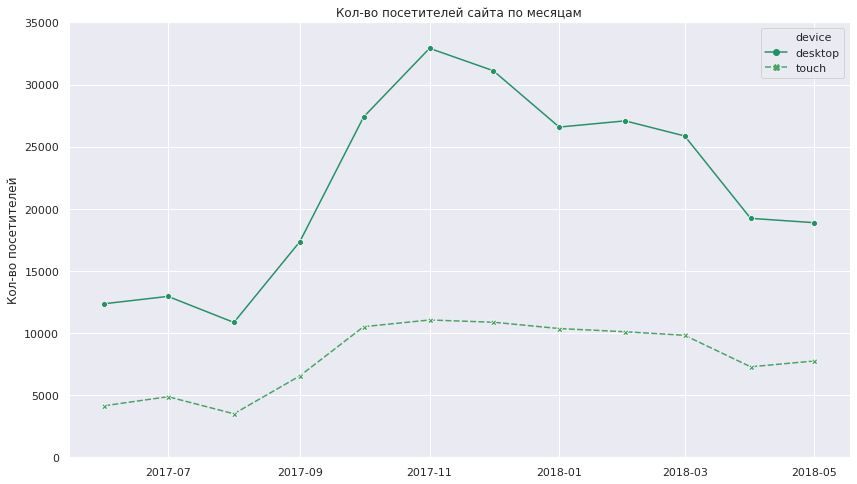

In [17]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = metrics_grouped_month,
    x = 'session_month', y = 'uid', markers = True, hue = 'device', style = 'device')
plt.ylim(0, 35000)
plt.title('Кол-во посетителей сайта по месяцам')
plt.xlabel('')
plt.ylabel('Кол-во посетителей');

По построенному графику видно, что большая часть (65-75% в зависимости от месяца) пользователей приходит с десктопов. Графики по типам девайсов схожи, пик кривой десктопов более выражен, но для обоих типов устройств он приходится на ноябрь-декабрь 2017г. с последующим падением к значениямнесолько превышающим начальные. Это может быть связано, как с сезонной активностью пользователей (рост начинается с приближением театрального сезона и продолжается до нового года), так и с увеличенной активностью маркетологов и ростом затрат на привлечение новых клиентов. Это мы проверим в других частях работы.

<b> Расчет Sticky Factor: </b>

In [18]:
#за месяц
sfm = (dau_total / mau_total) * 100
#за неделю
sfw = (dau_total / wau_total) * 100
print('Sticky factor за неделю: {:.2f} %' .format(float(sfw)))
print('Sticky factor за месяц: {:.2f} %' .format(float(sfm)))

Sticky factor за неделю: 16.15 %
Sticky factor за месяц: 3.91 %


In [19]:
#сводная таблица количества сессий с разбивкой по месяцам и годам
sessions_per_user = metrics.groupby(['session_year', 'session_month']).agg({'uid' :['count', 'nunique']})
sessions_per_user.columns = ['count', 'nunique']
sessions_per_user['sessions_per_user'] = sessions_per_user['count'] / sessions_per_user['nunique']
sessions_per_user

count  nunique  sessions_per_user
session_year session_month                                   
2017         2017-06-01     16505    13259           1.244815
             2017-07-01     17828    14183           1.256998
             2017-08-01     14355    11631           1.234202
             2017-09-01     23907    18975           1.259921
             2017-10-01     37903    29692           1.276539
             2017-11-01     43969    32797           1.340641
             2017-12-01     41983    31557           1.330386
2018         2018-01-01     36939    28716           1.286356
             2018-02-01     37182    28749           1.293332
             2018-03-01     35679    27473           1.298693
             2018-04-01     26515    21008           1.262138
             2018-05-01     26635    20701           1.286653

In [20]:
sessions_per_user['sessions_per_user'].mean().round(2)

1.28

В среднем в месяц пользователь проводит 1 сессию. Можно рассчитать среднее кол-во сессий в день, но это будет слишком условное значение, так как оно зависит от промежутка, на основании которого мы делаем расчет. Можно рассчитать среднее кол-во сессий в день по каждой дате, но это не показательное значение.

In [21]:
#сводная таблица количества сессий с разбивкой по месяцам и годам
sessions_per_user_d = metrics.groupby(['session_year', 'session_month', 'session_date']).agg({'uid' :['count', 'nunique']})
sessions_per_user_d.columns = ['count', 'nunique']
sessions_per_user_d['sessions_per_user'] = sessions_per_user_d['count'] / sessions_per_user_d['nunique']
display(sessions_per_user_d.head())
display(sessions_per_user_d['sessions_per_user'].mean().round(2))

count  nunique  sessions_per_user
session_year session_month session_date                                   
2017         2017-06-01    2017-06-01      664      605           1.097521
                           2017-06-02      658      608           1.082237
                           2017-06-03      477      445           1.071910
                           2017-06-04      510      476           1.071429
                           2017-06-05      893      820           1.089024

1.08

Чуть более 1 сессии в день, но при этом чуть более 1 сессии в месяц, то есть пользуются сайтом очень нерегулярно.

<b> Расчет метрики ASL (среднее время длительности сессии): </b>

In [22]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
asl = visits.groupby('device')['session_duration_sec'].median()
print('Средняя длительность сессии: {}c' .format(asl))

Средняя длительность сессии: device
desktop    360
touch      180
Name: session_duration_sec, dtype: int64c


Проверим моды по признаку.

In [23]:
print(visits[visits['device'] == 'touch']['session_duration_sec'].mode())

0    60
dtype: int64


In [24]:
print(visits[visits['device'] == 'desktop']['session_duration_sec'].mode())

0    60
dtype: int64


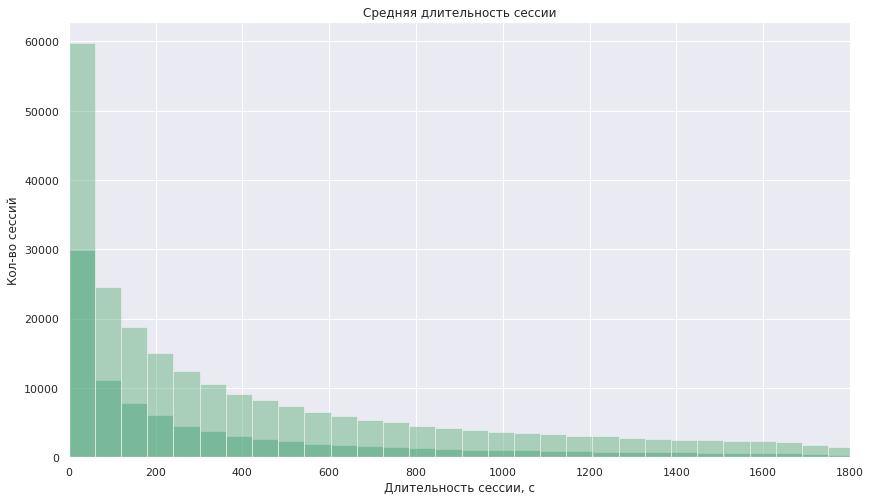

In [25]:
fig = plt.figure(figsize = (14, 8))
plt.xlim(0, 1800)
touch_d = visits.loc[visits['device'] == 'touch']
desktop_d = visits.loc[visits['device'] == 'desktop']
sns.distplot(touch_d['session_duration_sec'], bins = 511, kde = False)
sns.distplot(desktop_d['session_duration_sec'], bins = 1400, kde = False)
plt.xlabel('Длительность сессии, с')
plt.ylabel('Кол-во сессий')
plt.title('Средняя длительность сессии');

По расчетам, пользователи мобильных устройств проводят на сайте примерно в 2 раза меньше времени. Но моды и нистограмма распределения длительности сессий говорят о том, что чаще всего пользователи всех устройств проводят на сайте около минуты.  Так ли хорош сайт, что заказы делать так быстро и удобно, или наоборот, он настолько неудобен, что люди не могут найти нужные функции и покидают его?

<b> Расчет Retention Rate для пользователей </b>

Добавим столбец с датой первой сессии пользователя. Назовем новый датафрейм users_data.

In [26]:
#найдем дату первой сесии для каждого пользователя
first_activity_date = visits.groupby('uid')['session_date'].min()
first_activity_date.name = 'first_activity_date'
#присоединим полученный Series с датафреймом visits
users_data = visits.merge(first_activity_date, on = 'uid')
#проверим результат
users_data.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,1680,2018-03-09


Добавим месяц сессии пользователя и месяц первой сессии.

In [27]:
users_data['activity_month'] = users_data['session_date'].astype('datetime64[M]')
users_data['first_activity_month'] = users_data['first_activity_date'].astype('datetime64[M]')
users_data.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,1440,2018-03-09,2018-05-01,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,1680,2018-03-09,2018-03-01,2018-03-01


Добавим длительность жизни когорты.

In [28]:
#вычислим разность между месяцем сессии и месяцем первой сессии пользователя
users_data['cohort_lifetime'] = users_data['activity_month'] - users_data['first_activity_month']
#приведем полученный столбец к формату количества месяцев
users_data['cohort_lifetime'] = users_data['cohort_lifetime'] / np.timedelta64(1,'M')
#округлим полученное значение и приведем его к целочисленному формату
users_data['cohort_lifetime'] = users_data['cohort_lifetime'].round().astype('int')
users_data

,device,end_ts,source_id,start_ts,uid,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,1440,2018-03-09,2018-05-01,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,1680,2018-03-09,2018-03-01,2018-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,480,2018-04-23,2018-04-01,2018-04-01,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,0,2017-11-08,2017-11-01,2017-11-01,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,1080,2017-07-31,2017-07-01,2017-07-01,0
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,840,2018-03-20,2018-03-01,2018-03-01,0


Проверим результат на одной из когорт.

In [29]:
users_data[(users_data['first_activity_month'] == '2017-06-01') & (users_data['activity_month'] == '2017-09-01')].head()

,device,end_ts,source_id,start_ts,uid,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month,cohort_lifetime
96,desktop,2017-09-28 21:58:00,1,2017-09-28 21:50:00,8056418121947262981,2017-09-28,480,2017-06-04,2017-09-01,2017-06-01,3
110,desktop,2017-09-29 22:44:00,1,2017-09-29 22:40:00,8056418121947262981,2017-09-29,240,2017-06-04,2017-09-01,2017-06-01,3
129,desktop,2017-09-16 20:56:00,4,2017-09-16 20:56:00,8056418121947262981,2017-09-16,0,2017-06-04,2017-09-01,2017-06-01,3
136,desktop,2017-09-30 18:48:00,1,2017-09-30 17:27:00,8056418121947262981,2017-09-30,4860,2017-06-04,2017-09-01,2017-06-01,3
180,desktop,2017-09-08 01:13:00,2,2017-09-08 00:03:00,8056418121947262981,2017-09-08,4200,2017-06-04,2017-09-01,2017-06-01,3


Получим датафрейм с когортами и количеством уникальных пользователей в каждой.

In [30]:
#сводная таблица каждой когорты, длительности жизни когорты и кол-ва пользователей на каждом отрезке
cohorts = users_data.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#проверим результат
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Создадим датафрейм с начальным количеством польователей каждой когорты.

In [31]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [32]:
#переименуем столбец с количеством пользователей для дальнейшего слияния таблиц
initial_users_count = initial_users_count.rename(columns = {'uid':'cohort_users'})
#объединим датафреймы cohorts и initial users по имени когорты
cohorts = cohorts.merge(initial_users_count,on = 'first_activity_month')
#вычислим параметр 'retention' - отношение кол-ва активных пользователей в когорте к начальному кол-ву
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Рассчитаем сводную таблицу коэффициента удержания (Retention Rate).

In [33]:
retention_pivot = cohorts.pivot_table(
    index = 'first_activity_month', columns = 'cohort_lifetime', values = 'retention', aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Напишем функцию для построения тепловой карты.

In [34]:
def heatmap(data, title, fmt, vmin, vmax):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 9)
    plt.title(title)
    sns.heatmap(data, annot = True, linewidths = 1, linecolor = 'gray', fmt = fmt,
               vmin = vmin, vmax = vmax, cmap = 'Greens');

Применим функцию к датафрейму retention_pivot:

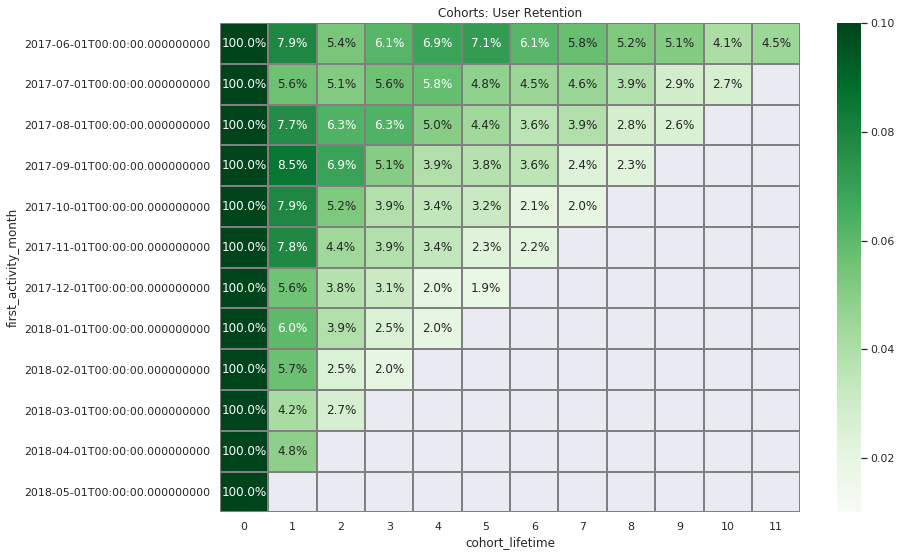

In [35]:
heatmap(retention_pivot, 'Cohorts: User Retention', '.1%', 0.01, 0.1)

Можно заметить, что первая когорта (зарегистрировавшиеся в июне 2017) имеет самый высокий коэффициент удержания - самое высокое кол-во пользователей, остающихся пользоваться Афишей. Возможно, первые зарегистрировавшиеся имели какие-то бонусы, или условия и контент были интереснее в первые месяцы.

Напишем функцию для вывод коэффициента удержания пользователей и вывода тепловой карты для разных девайсов.

In [36]:
def retention(name, device):
    #сводная таблица каждой когорты, длительности жизни когорты и кол-ва пользователей на каждом отрезке
    users_dev = users_data[users_data['device'] == device]
    cohorts_dev = users_dev.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
    #проверим результат
    cohorts_dev.head()

    device_users_count = cohorts_dev[cohorts_dev['cohort_lifetime'] == 0][['first_activity_month','uid']]

    #переименуем столбец с количеством пользователей для дальнейшего слияния таблиц
    device_users_count = device_users_count.rename(columns = {'uid':'cohort_users'})
    #объединим датафреймы cohorts и initial users по имени когорты
    cohorts_dev = cohorts_dev.merge(device_users_count,on = 'first_activity_month')
    #вычислим параметр 'retention' - отношение кол-ва активных пользователей в когорте к начальному кол-ву
    cohorts_dev['retention'] = cohorts_dev['uid'] / cohorts_dev['cohort_users']
    
    #сводная таблица Retention Rate
    retention_pivot_dev = cohorts_dev.pivot_table(
        index = 'first_activity_month',columns = 'cohort_lifetime',values = 'retention',aggfunc='sum')
    display(retention_pivot_dev.fillna(''))
    heatmap(retention_pivot_dev, name, '.1%', 0.01, 0.1)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0659371,0.0396717,0.0473324,0.0585499,0.0552668,0.0549932,0.0459644,0.0426813,0.0429549,0.0344733,0.0426813
2017-07-01,1.0,0.0479658,0.0436966,0.0489704,0.0479658,0.04445,0.0376695,0.0379206,0.0349071,0.0246107,0.0273732,
2017-08-01,1.0,0.0711731,0.0575823,0.0554363,0.0407725,0.0400572,0.0354077,0.0396996,0.019671,0.019671,,
2017-09-01,1.0,0.0849406,0.0615624,0.0442237,0.0372102,0.0315605,0.0323398,0.0204559,0.0216248,,,
2017-10-01,1.0,0.0733758,0.0490446,0.0373248,0.0307006,0.0276433,0.0183439,0.016051,,,,
2017-11-01,1.0,0.0777466,0.0449619,0.0363977,0.035461,0.0214104,0.0202061,,,,,
2017-12-01,1.0,0.0666197,0.0384507,0.0333803,0.0201408,0.0169014,,,,,,
2018-01-01,1.0,0.0584212,0.0387575,0.0225135,0.0185238,,,,,,,
2018-02-01,1.0,0.0524465,0.0225608,0.0208028,,,,,,,,


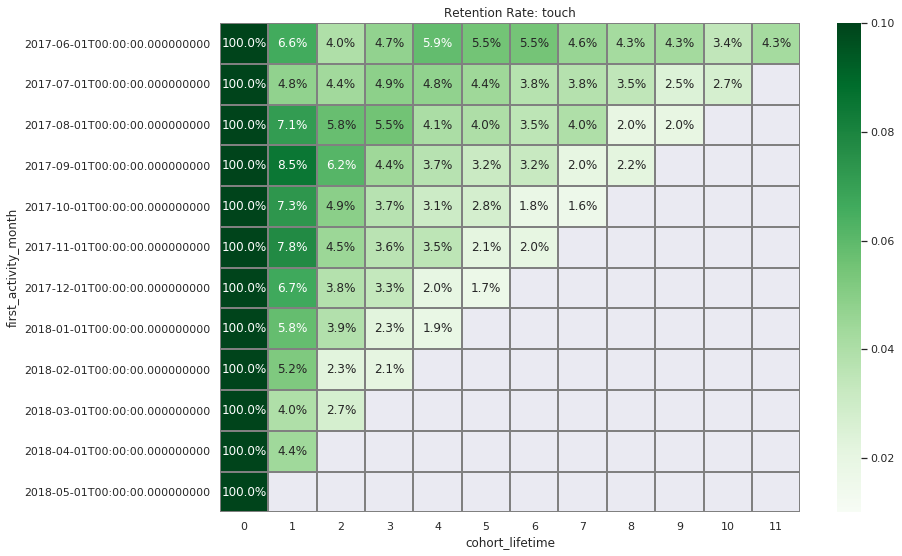

In [37]:
retention('Retention Rate: touch', 'touch')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0853396,0.060752,0.068743,0.0759144,0.0818564,0.0672062,0.0642352,0.0588055,0.0565516,0.0451798,0.0482533
2017-07-01,1.0,0.0609966,0.0558419,0.0609966,0.0646478,0.0518686,0.050043,0.0497208,0.0419888,0.0310352,0.0284579,
2017-08-01,1.0,0.0809396,0.0660403,0.067651,0.0544966,0.0468456,0.0374497,0.0405369,0.0314094,0.0292617,,
2017-09-01,1.0,0.0882629,0.0746906,0.0559112,0.0413999,0.0422535,0.0384123,0.0257789,0.0238156,,,
2017-10-01,1.0,0.0829223,0.0550106,0.0401062,0.0369086,0.0350117,0.0229256,0.0223836,,,,
2017-11-01,1.0,0.0804312,0.044811,0.0400417,0.0338318,0.0242933,0.0224055,,,,,
2017-12-01,1.0,0.0526544,0.0383532,0.0306067,0.0200975,0.0200975,,,,,,
2018-01-01,1.0,0.0621165,0.0403568,0.0261244,0.021317,,,,,,,
2018-02-01,1.0,0.0601181,0.0268189,0.020018,,,,,,,,


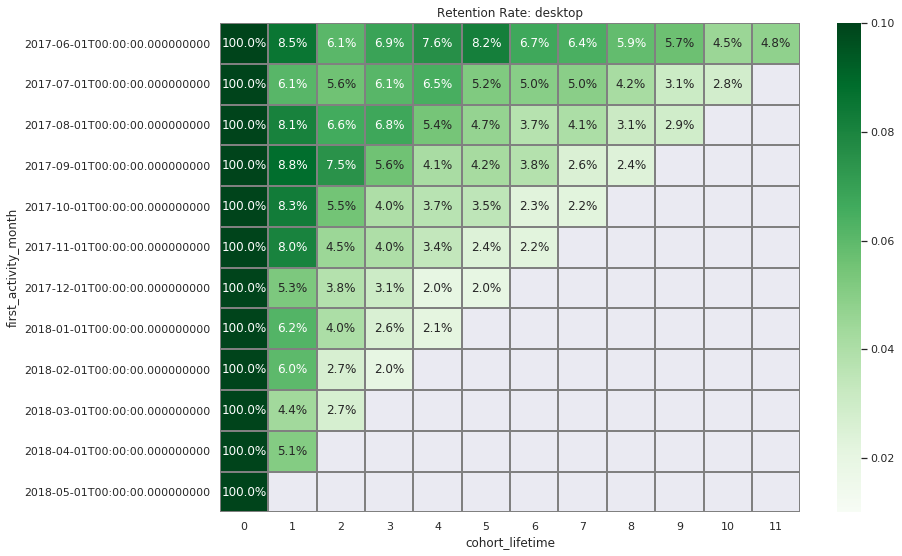

In [38]:
retention('Retention Rate: desktop', 'desktop')

Можно сделать вывод, что пользователи настольной версии чаще возвращаются на сайт. Похоже, с мобильной версией нужно что-то делать.

#### Вывод

- Были рассчитаны DAU, MAU и WAU по исходным датафреймам, а также Sticky factor. Месячный SF оказался немногим ниже 4%, что достаточно низкое значение. Возможно, маркетологам стоит лучше работать, но также возможно, что тип услуг на сайте не пользуется регулярным спросом из-за специфики. <br>
- Было так же рассчитано среднее кол-во сессий в день и месяц, значение чуть выше 1 сессии, то есть нашим сайтом пользуются нерегулярно, что логично, это не онлайн игра, специфика иная. <br>
- Рассчитана метрика ASL (среднее время длительности сессии) - 300c, но при этом мода показывает, что большая часть пользователей проводит на сайте около минуты. Или быстро находят, что ищут, или не могут найти и теряют интерес. <br>
- Коэффициент удержания клиентов Retention Rate достаточно низок, возможно, нужно поработать маркетологам. Также есть вероятность, что услуги сайта редко востребованы, и многие пользователи не нуждаются в них чаще, чем, к примеру, один раз в год. Retention Rate для пользователей десктопной версии выше, чем для мобильной, похоже, нужно заняться мобильной версией.


#### Шаг 2.2 Исследование продаж  <a id='step2.2'></a>

Создадим датафрейм с "профилем" пользователя. В него включим признаки: id пользователя, время начала сессии, источник первого посещения, тип устройства первого посещения, стоимость привлечения юзера.

In [39]:
costs = costs.rename(columns = {'dt': 'acquisition_date'})

users = visits.groupby('uid').agg({'start_ts':'min', 'source_id':'first', 'device':'first'}) 
users['acquisition_date'] = users['start_ts'].dt.date
users['acquisition_month'] = users['start_ts'].astype('datetime64[M]')
users = (users.reset_index().set_index(['source_id', 'acquisition_date'])
         .join(costs.set_index(['source_id', 'acquisition_date']), how = 'left'))

user_cost = (users.groupby(['source_id', 'acquisition_date']).agg({'device': 'count', 'costs':'max'})
             .rename(columns = {'device': 'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']
users = users.join(user_cost[['acquisition_cost']], how = 'left')
users = users.reset_index().set_index('uid')[['start_ts', 'acquisition_date', 
                                              'acquisition_month', 'source_id', 'device', 'acquisition_cost']]
users = users.reset_index()
users.head()

,uid,start_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
0,585738041899923335,2017-06-01 19:15:00,2017-06-01,2017-06-01,1,desktop,1.566667
1,618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.566667
2,1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.566667
3,1186757012633220834,2017-06-01 10:48:00,2017-06-01,2017-06-01,1,desktop,1.566667
4,1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.566667


Получим датафрейм с временем первой покупки каждого пользователя.

<b> Расчет времени от посещения до первого заказа </b>

In [40]:
#сводная таблица первого заказа каждого пользователя
orders_time = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
orders_time.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Объединим полученные датафреймы.

In [41]:
#объединим датафреймы по столбцу 'uid'
users_final = users.merge(orders, on = 'uid')
#добавим столбец с разницей между временем начала первой сессии и временем покупки
users_final['delta'] = (users_final['buy_ts'] - users_final['start_ts']) 
users_final

,uid,start_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,buy_ts,revenue,delta
0,585738041899923335,2017-06-01 19:15:00,2017-06-01,2017-06-01,1,desktop,1.566667,2017-06-01 22:08:00,0.15,0 days 02:53:00
1,1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.566667,2017-06-01 09:23:00,0.37,0 days 00:02:00
2,1186757012633220834,2017-06-01 10:48:00,2017-06-01,2017-06-01,1,desktop,1.566667,2017-06-05 13:02:00,2.75,4 days 02:14:00
3,1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.566667,2017-06-01 16:47:00,4.28,0 days 03:54:00
4,3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.566667,2017-06-01 20:35:00,0.24,0 days 00:27:00
...,...,...,...,...,...,...,...,...,...,...
50410,14350420740207733259,2018-05-31 10:15:00,2018-05-31,2018-05-01,10,desktop,0.174257,2018-05-31 10:15:00,25.67,0 days 00:00:00
50411,14350420740207733259,2018-05-31 10:15:00,2018-05-31,2018-05-01,10,desktop,0.174257,2018-05-31 11:08:00,18.33,0 days 00:53:00
50412,15116668155510764243,2018-05-31 22:47:00,2018-05-31,2018-05-01,10,desktop,0.174257,2018-05-31 22:50:00,2.44,0 days 00:03:00
50413,15576344609395725707,2018-05-31 23:35:00,2018-05-31,2018-05-01,10,desktop,0.174257,2018-05-31 23:40:00,2.26,0 days 00:05:00


Проверим полученные значения в столбце. Видим, что есть и очень низкие значения (в т.ч. нулевые), так и высокие (сотни дней).

In [42]:
users_final['delta'].value_counts()

0 days 00:01:00      2656
0 days 00:00:00      2455
0 days 00:02:00      2099
0 days 00:03:00      1686
0 days 00:04:00      1465
                     ... 
81 days 03:26:00        1
180 days 21:56:00       1
78 days 02:09:00        1
125 days 07:53:00       1
4 days 01:24:00         1
Name: delta, Length: 21656, dtype: int64

Вычислим медианное значение, так как среднее должно быть смещено из-за больших выбросов.

In [43]:
users_final['delta'].median()

Timedelta('0 days 03:26:00')

Получаем довольно большое значение. Возьмем моду и построим гистограмму распределения дельты времени.

In [44]:
users_final['delta'].mode()

0   00:01:00
dtype: timedelta64[ns]

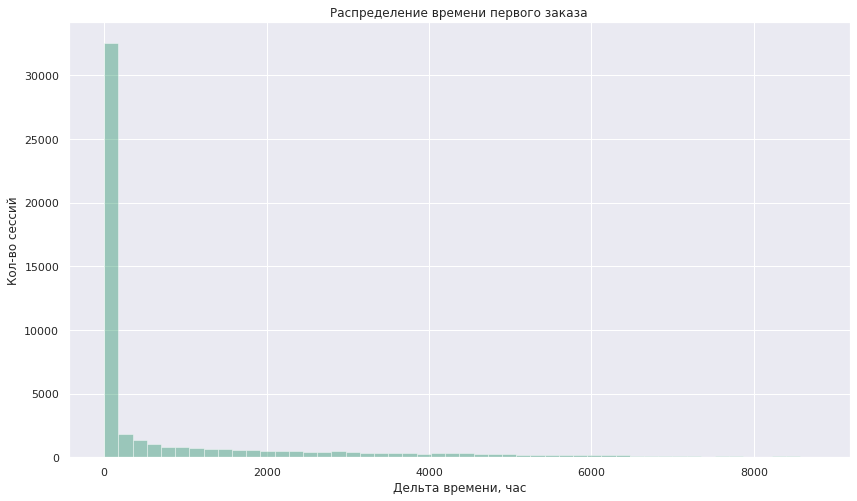

In [45]:
fig = plt.figure(figsize = (14, 8))
sns.distplot((users_final['delta'] / np.timedelta64(1,'h')), bins = 50, kde = False)
plt.xlabel('Дельта времени, час')
plt.ylabel('Кол-во сессий')
plt.title('Распределение времени первого заказа');

Как видно, чаще всего пользователи тратят на заказ около минуты. Видимо, маленькие заказы, где на заполнение корзины тратится мало времени.

<b> Расчет среднего кол-ва покупок в месяц </b>

Теперь рассчитаем среднее количество покупок за месяц. Добавим столбец с месяцем покупки в датафрейм orders.

In [46]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Сгруппируем датафрейм orders по когортам (месяц первого заказа). Назовем полученный датафрейм first_orders.

In [47]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#объединим полученный датафрейм с датафреймом users_final по столбцу 'uid'
first_orders = first_orders.merge(users_final, on = 'uid')
#добавим столбец 'order_month' - месяц первого заказа
first_orders['order_month'] = first_orders['buy_ts'].astype('datetime64[M]')
first_orders

,uid,first_order_month,start_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,buy_ts,revenue,delta,order_month
0,313578113262317,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-01,2,desktop,1.987692,2018-01-03 21:51:00,0.55,106 days 23:02:00,2018-01-01
1,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,10,touch,0.506316,2017-06-03 10:13:00,1.22,0 days 00:00:00,2017-06-01
2,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,10,touch,0.506316,2017-06-03 17:39:00,1.83,0 days 07:26:00,2017-06-01
3,2429014661409475,2017-10-01,2017-10-11 17:14:00,2017-10-11,2017-10-01,3,desktop,1.728446,2017-10-11 18:33:00,73.33,0 days 01:19:00,2017-10-01
4,2464366381792757,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-01,5,desktop,1.123088,2018-01-28 15:54:00,2.44,0 days 19:44:00,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-01,2017-09-22 23:48:00,2017-09-22,2017-09-01,3,desktop,1.967832,2017-09-24 23:48:00,0.24,2 days 00:00:00,2017-09-01
50411,18445407535914413204,2017-09-01,2017-09-22 23:48:00,2017-09-22,2017-09-01,3,desktop,1.967832,2017-09-25 15:56:00,0.12,2 days 16:08:00,2017-09-01
50412,18445601152732270159,2018-03-01,2017-08-07 11:51:00,2017-08-07,2017-08-01,2,desktop,1.168571,2018-03-26 22:54:00,4.22,231 days 11:03:00,2018-03-01
50413,18446156210226471712,2018-02-01,2017-11-07 10:01:00,2017-11-07,2017-11-01,3,desktop,1.938074,2018-02-18 19:34:00,9.78,103 days 09:33:00,2018-02-01


Определим размеры когорт.

In [48]:
#сгруппируем датафрейм first_orders по когортам, значения - кол-во уникальных пользователей
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
#переименуем столбцы
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#ознакомимся с результатом
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Создадим таблицу с информацией по когортам.

In [49]:
#сгруппируем таблицу first_orders по когорте и месяцу заказа
cohorts = first_orders.groupby(['first_order_month','order_month']).agg(
    {'uid': 'nunique', 'revenue':['sum', 'count']}).reset_index()
#переименуем столбцы
cohorts.columns = ['first_order_month', 'order_month', 'uid', 'revenue_sum', 'buy_count']
#получим среднее кол-во заказов в месяц
cohorts['mean'] = cohorts['buy_count'] / cohorts['uid']
#получим средний чек по когортам
cohorts['avg_check'] = (cohorts['revenue_sum'] / cohorts['buy_count']).round(2)
#добавим "возраст" когорты
cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
cohorts['age'] = cohorts['age'].round().astype('int')
#проверим результат
cohorts.head()

,first_order_month,order_month,uid,revenue_sum,buy_count,mean,avg_check,age
0,2017-06-01,2017-06-01,2023,9557.49,2354,1.163618,4.06,0
1,2017-06-01,2017-07-01,61,981.82,177,2.901639,5.55,1
2,2017-06-01,2017-08-01,50,885.34,174,3.480000,5.09,2
3,2017-06-01,2017-09-01,54,1931.30,226,4.185185,8.55,3
4,2017-06-01,2017-10-01,88,2068.58,292,3.318182,7.08,4


Создадим сводную таблицу среднего числа покупок по когортам их возрасту.

In [50]:
output = cohorts.pivot_table(
        index = 'first_order_month', 
        columns = 'age', 
        values = 'mean', 
        aggfunc = 'mean').round(2)
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,2.9,3.48,4.19,3.32,3.25,4.45,3.7,3.66,3.4,2.13,1.62
2017-07-01,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,
2017-08-01,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,,
2017-09-01,1.14,1.68,1.61,2.22,1.29,1.7,1.64,1.51,1.42,,,
2017-10-01,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,,,,
2017-11-01,1.18,1.79,1.52,1.99,1.68,1.23,1.65,,,,,
2017-12-01,1.15,1.85,1.96,1.85,1.72,1.67,,,,,,
2018-01-01,1.12,1.96,1.92,1.49,1.73,,,,,,,
2018-02-01,1.12,1.88,1.43,1.79,,,,,,,,


Выведем тепловую карту по полученному датафрейму.

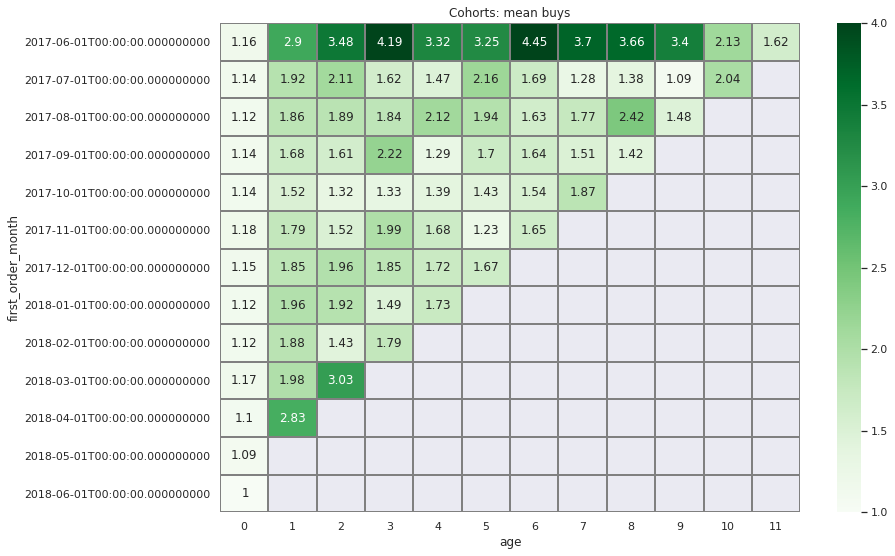

In [51]:
heatmap(output, 'Cohorts: mean buys', '2g', 1, 4);

In [52]:
pd.DataFrame(output.mean(axis = 1))

,0
first_order_month,
2017-06-01,3.105000
2017-07-01,1.627273
2017-08-01,1.807000
2017-09-01,1.578889
2017-10-01,1.442500
2017-11-01,1.577143
2017-12-01,1.700000
2018-01-01,1.644000
2018-02-01,1.555000


Как мы видим, самая "покупающая" - первая когорта. Видимо, как и в случае с Retention Rate, это обусловлено какими-то особыми условиями и бонусами, которые были предоставлены первым пользователям.

<b> Расчет среднего чека покупателя </b>

Создадим сводную таблицу среднего чека покупателя по когортам.

In [53]:
output_revenue = cohorts.pivot_table(
        index = 'first_order_month', 
        columns = 'age', 
        values = 'avg_check', 
        aggfunc = 'mean')

#выведем результат и заполним пропуски
output_revenue.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


Выведем тепловую карту.

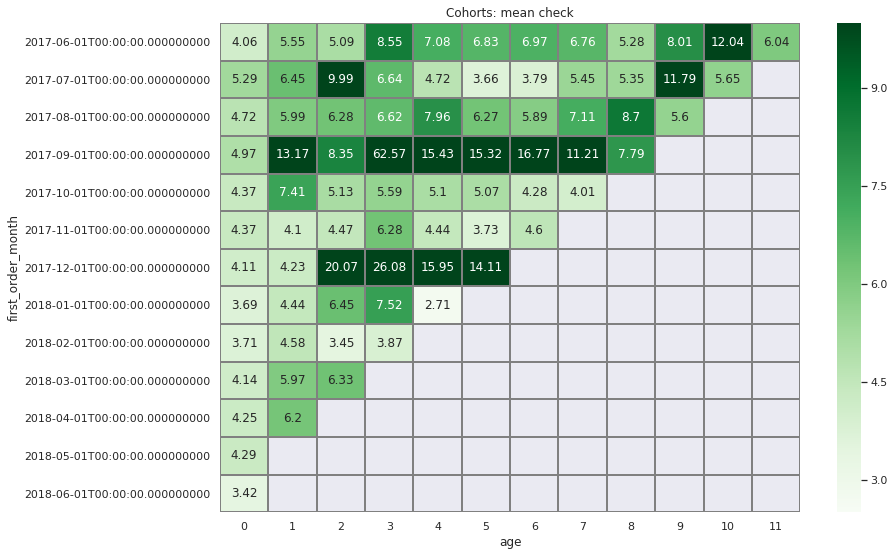

In [54]:
heatmap(output_revenue, 'Cohorts: mean check', '2g', 2.5, 10);

В целом средние чеки по когортам примерно на одном уровне. Выделяются лишь когорты сентября и декабря 2017г. Возможно, для зарегистрировавшихся в эти месяцы были какие-то эксклюзивные предложения на закрытые дорогие ивенты?

<b> Расчет LTV </b>

Для нахождения LTV по когортам объединим датафреймы с размером когорт и информацией по когортам.

In [55]:
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
#примем маржинальность равной 1
margin_rate = 1
#найдем валовую прибыль когорт
report['gp'] = report['revenue_sum'] * margin_rate
#ознакомимся с результатом
report.head()

,first_order_month,n_buyers,order_month,uid,revenue_sum,buy_count,mean,avg_check,age,gp
0,2017-06-01,2023,2017-06-01,2023,9557.49,2354,1.163618,4.06,0,9557.49
1,2017-06-01,2023,2017-07-01,61,981.82,177,2.901639,5.55,1,981.82
2,2017-06-01,2023,2017-08-01,50,885.34,174,3.480000,5.09,2,885.34
3,2017-06-01,2023,2017-09-01,54,1931.30,226,4.185185,8.55,3,1931.30
4,2017-06-01,2023,2017-10-01,88,2068.58,292,3.318182,7.08,4,2068.58


Найдем LTV, визуализируем когорты в виде сводной таблицы.

In [56]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output_ltv = report.pivot_table(
        index = 'first_order_month', 
        columns = 'age', 
        values = 'ltv', 
        aggfunc = 'mean').round(2)

#заполним пропуски пустыми значениями
output_ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Рассчитаем среднее значение месячного LTV по всем когортам.

In [57]:
ltv_mean = pd.DataFrame(output_ltv.mean(axis=1)).round(2)
ltv_mean.columns = ['ltv_mean']
ltv_mean

,ltv_mean
first_order_month,
2017-06-01,0.99
2017-07-01,0.76
2017-08-01,0.85
2017-09-01,1.49
2017-10-01,0.80
2017-11-01,0.91
2017-12-01,1.28
2018-01-01,0.99
2018-02-01,1.15


In [58]:
merged_ltv = output_ltv.cumsum(axis = 1).merge(ltv_mean, left_index = True, right_index = True)
merged_ltv.fillna('')

,0,1,2,3,4,5,6,7,8,9,10,11,ltv_mean
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88,0.99
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,,0.76
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,,0.85
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,,1.49
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,,0.80
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,,0.91
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,,1.28
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,,0.99
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,,1.15


Выведем на экран тепловую карту по полученной сводной таблице.

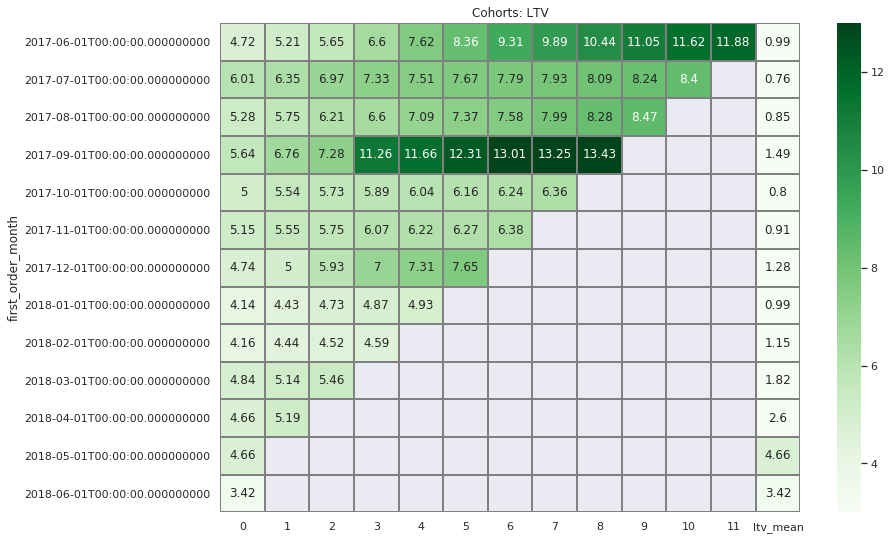

In [59]:
heatmap(merged_ltv, 'Cohorts: LTV', '2g', 3, 13)

Из когорт с возрастом более 6 месяцев, наибольший средний LTV у декабрьской и сентябрьской когорт. Какие-то бонусы с начала сезона помогают вернуться и потратить больше денег.

Исследуем зависимость LifeTime Value когорт в зависимости от используемого пользователями типа устройств. Напишем функцию для вывода сводной таблицы LTV для различных типов устройств.

In [60]:
def ltv(name, title):
    
    ''' Функция для нахождения LTV по когортам различных типов девайсов '''
    
    first_orders_desktop = first_orders[first_orders['device'] == name]

    cohort_sizes_desktop = first_orders_desktop.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_desktop.columns = ['first_order_month', 'n_buyers']

    cohorts_desktop = first_orders_desktop.groupby(['first_order_month','order_month']).agg(
        {'uid': 'nunique', 'revenue':['sum', 'count']}).reset_index()
    cohorts_desktop.columns = ['first_order_month', 'order_month', 'uid', 'revenue_sum', 'buy_count']
    cohorts_desktop['mean'] = cohorts_desktop['buy_count'] / cohorts_desktop['uid']
    cohorts_desktop['avg_check'] = (cohorts_desktop['revenue_sum'] / cohorts_desktop['buy_count']).round(2)

    cohorts_desktop['age'] = (cohorts_desktop['order_month'] - cohorts_desktop['first_order_month']) / np.timedelta64(1, 'M')
    cohorts_desktop['age'] = cohorts_desktop['age'].round().astype('int')

    report_desktop = pd.merge(cohort_sizes_desktop, cohorts_desktop, on = 'first_order_month')
    margin_rate = 1
    report_desktop['gp'] = report_desktop['revenue_sum'] * margin_rate

    report_desktop['ltv'] = report_desktop['gp'] / report_desktop['n_buyers']

    output_ltv_desktop = report_desktop.pivot_table(
            index = 'first_order_month', 
            columns = 'age', 
            values = 'ltv', 
            aggfunc = 'mean').round(2)

    ltv_mean_desktop = pd.DataFrame(output_ltv_desktop.mean(axis=1)).round(2)
    ltv_mean_desktop.columns = ['ltv_mean']
    merged_ltv_desktop = output_ltv_desktop.cumsum(axis = 1).merge(ltv_mean_desktop, left_index = True, right_index = True)
    merged_ltv_desktop.fillna('')
    
    display(merged_ltv_desktop.fillna(''))
    display(heatmap(merged_ltv_desktop, title, '2g', 4, 9))
    

Найдем распределение LTV для когорт пользователей мобильных устройств.

,0,1,2,3,4,5,6,7,8,9,10,11,ltv_mean
first_order_month,,,,,,,,,,,,,
2017-06-01,3.99,4.36,4.5,4.58,4.95,5.1,5.15,5.15,5.27,5.54,5.64,6.45,0.54
2017-07-01,6.22,6.44,6.48,6.68,6.83,6.97,7.03,7.11,7.21,7.27,7.37,,0.67
2017-08-01,5.22,5.37,5.48,5.56,5.65,5.9,6.05,6.17,6.24,6.33,,,0.63
2017-09-01,4.73,6.36,7.02,7.15,7.17,7.23,7.38,7.4,7.45,,,,0.83
2017-10-01,4.71,5.53,5.64,5.73,5.81,5.93,5.96,6.09,,,,,0.76
2017-11-01,5.97,6.07,6.18,6.25,6.33,6.35,6.38,,,,,,0.91
2017-12-01,3.96,4.1,4.16,4.25,4.28,4.31,,,,,,,0.72
2018-01-01,4.04,4.15,4.25,4.31,4.34,,,,,,,,0.87
2018-02-01,4.06,4.32,4.35,4.37,,,,,,,,,1.09


None

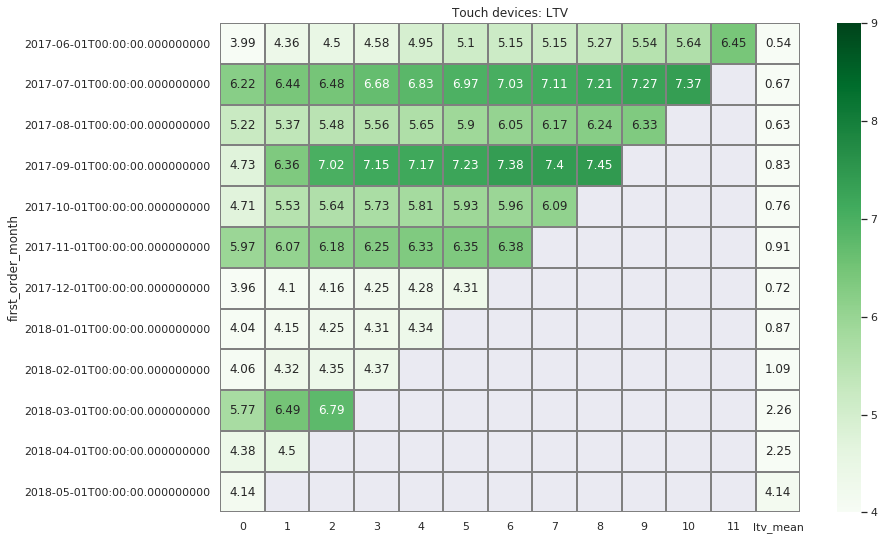

In [61]:
ltv('touch', 'Touch devices: LTV')

Найдем распределение LTV для когорт пользователей компьютеров.

,0,1,2,3,4,5,6,7,8,9,10,11,ltv_mean
first_order_month,,,,,,,,,,,,,
2017-06-01,4.88,5.39,5.89,7.03,8.19,9.05,10.19,10.89,11.53,12.2,12.87,13.01,1.08
2017-07-01,5.95,6.32,7.1,7.5,7.68,7.84,7.98,8.14,8.32,8.49,8.66,,0.79
2017-08-01,5.29,5.84,6.38,6.84,7.43,7.72,7.95,8.42,8.76,8.97,,,0.90
2017-09-01,5.87,6.86,7.35,12.3,12.8,13.6,14.44,14.74,14.96,,,,1.66
2017-10-01,5.07,5.54,5.75,5.92,6.09,6.21,6.31,6.42,,,,,0.80
2017-11-01,4.97,5.44,5.66,6.04,6.2,6.26,6.39,,,,,,0.91
2017-12-01,4.93,5.22,6.36,7.67,8.05,8.46,,,,,,,1.41
2018-01-01,4.16,4.5,4.86,5.03,5.1,,,,,,,,1.02
2018-02-01,4.18,4.46,4.55,4.64,,,,,,,,,1.16


None

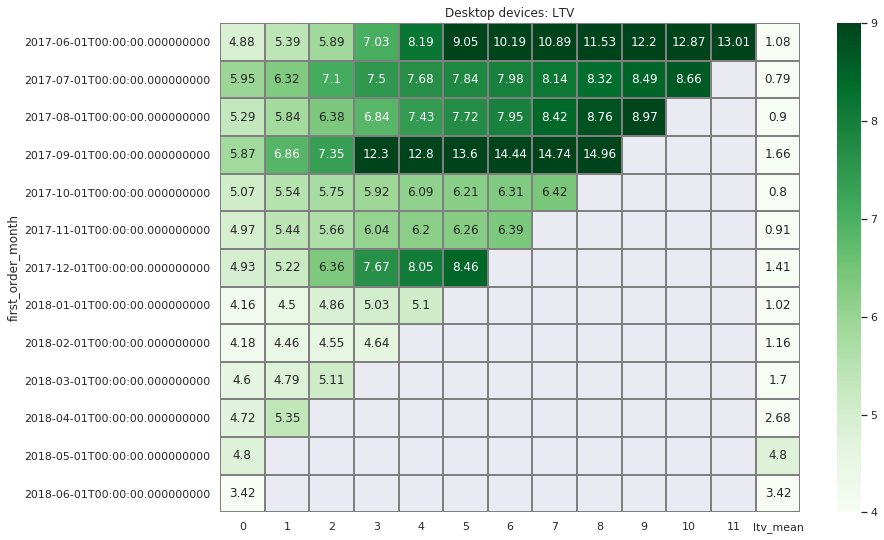

In [62]:
ltv('desktop', 'Desktop devices: LTV')

В целом, клиенты, пришедшие на сайт с компьютеров приносят больше прибыли, чем с мобильных устройств, независимо от когорты. Видимо, дает о себе знать большое удобство десктопной версии, возможно, и ее функционал. Да и всегда проще совершить покупку за большим монитором. <br>
При этом сезонность у мобильных устройств несколько нарушена. Самыми "ценными" являются не первые месяцы сезона, а 7, 9 и 11. Может, у разных версий сайта разные бонусные программы и разныая реклама.

Далее рассмотрим зависимость "пожизненной" ценности клиента с разбивкой по источникам рекламы. <br>
Рассчитаем размеры групп по источникам рекламы.

In [63]:
cohort_source_sizes = first_orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
#переименуем столбцы
cohort_source_sizes.columns = ['source_id', 'n_buyers']
cohort_source_sizes

,source_id,n_buyers
0,1,3743
1,2,4323
2,3,9138
3,4,9823
4,5,6839
5,7,1
6,9,1415
7,10,1241


Сводная таблица кол-ва пользователей, прибыли и кол-ва покупок по источникам.

In [64]:
cohorts_source = first_orders.groupby('source_id').agg(
    {'uid': 'nunique', 'revenue':['sum', 'count']}).reset_index()
cohorts_source.columns = ['source_id', 'uid', 'revenue_sum', 'buy_count']
#cohorts_source['mean'] = cohorts_source['buy_count'] / cohorts_source['uid']
#cohorts_source['avg_check'] = (cohorts_source['revenue_sum'] / cohorts_source['buy_count']).round(2)
cohorts_source

,source_id,uid,revenue_sum,buy_count
0,1,3743,38560.06,6679
1,2,4323,65152.26,7734
2,3,9138,44317.68,10941
3,4,9823,52479.75,12246
4,5,6839,40357.91,9310
5,7,1,1.22,1
6,9,1415,7076.98,2053
7,10,1241,4111.34,1451


Выведем окончательную таблицу с группами по источникам рекламы. 

In [65]:
#объединим таблицы cohort_source_sizes и cohorts_source
report_source = pd.merge(cohort_source_sizes, cohorts_source, on = 'source_id')
#примем маржинальность равной 1
margin_rate = 1
#рассчитаем валовую прибыль
report_source['gp'] = report_source['revenue_sum'] * margin_rate
report_source.head()

,source_id,n_buyers,uid,revenue_sum,buy_count,gp
0,1,3743,3743,38560.06,6679,38560.06
1,2,4323,4323,65152.26,7734,65152.26
2,3,9138,9138,44317.68,10941,44317.68
3,4,9823,9823,52479.75,12246,52479.75
4,5,6839,6839,40357.91,9310,40357.91


Рассчитаем накопительный LTV по различным источникам рекламы и построим столбчатую диаграмму.

In [66]:
report_source['ltv'] = report_source['gp'] / report_source['n_buyers']
    
output_source_ltv = report_source.pivot_table(
        index = 'source_id', 
        values = 'ltv', 
        aggfunc = 'mean').round(2)
    
output_source_ltv = output_source_ltv.reset_index()
output_source_ltv

,source_id,ltv
0,1,10.30
1,2,15.07
2,3,4.85
3,4,5.34
4,5,5.90
5,7,1.22
6,9,5.00
7,10,3.31


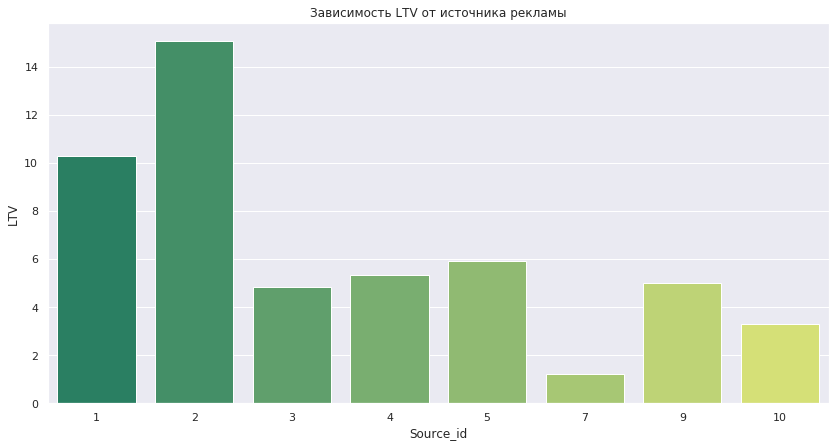

In [67]:
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'source_id', y = 'ltv', data = output_source_ltv, palette = 'summer')
plt.xlabel('Source_id')
plt.ylabel('LTV')
plt.title('Зависимость LTV от источника рекламы');

Наиболее выгодными с точки зрения прибыли с клиента являются источники 1 и 2. Но для полноценных выводов в дальнейшем нужно рассчитать метрику CAC по этим источникам.

#### Вывод

Проведен расчет разницы между временем начала сессии пользователя и совершением покупки. Медианное время примерно равно трем с половиной часам, но, возможно это значение искажено выбросами, так как покупка может быть совершена и во время второго или последующего визита. Большинство же пользователей тратят на заказ около минуты. Можно сделать вывод, что процесс оформления заказа хорошо продуман и удобен. <br>
Чаще всего покупают пользователи первой когорты, скорее всего это связано с какими-то бонусами или специальными программами для первых зарегистрировавшихся. Больше трех покупок в среднем на пользователя этой когорты, в то время, как по остальным когортам этот показатель - в районе 1,5-1,8.
Средний чек когорт начала сезона (июнь, сентяюрь, декабрь) заметно выше остальных когорт. С чем это связано, тружно сказать. Возможно, какие-то бонусные баллы или акции.

#### Шаг 2.3 Маркетинговые исследования  <a id='step2.3'></a>

Рассчитаем месячные расходы на маркетинг.

In [68]:
#создадим сводную таблицу зависимости суммарных расходов от месяца
costs['month'] = costs['acquisition_date'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()
monthly_revenue = pd.DataFrame(orders.groupby('order_month')['revenue'].sum()).reset_index()
monthly_revenue.columns = ['month', 'revenue']
monthly_costs = monthly_costs.merge(monthly_revenue, on = 'month')
monthly_costs['romi'] = monthly_costs['revenue'] / monthly_costs['costs']
monthly_costs

,month,costs,revenue,romi
0,2017-06-01,18015.00,9557.49,0.530530
1,2017-07-01,18240.59,12539.47,0.687449
2,2017-08-01,14790.54,8758.78,0.592188
3,2017-09-01,24368.91,18345.51,0.752824
4,2017-10-01,36322.88,27987.70,0.770525
5,2017-11-01,37907.88,27069.93,0.714098
6,2017-12-01,38315.35,36388.60,0.949713
7,2018-01-01,33518.52,19417.13,0.579296
8,2018-02-01,32723.03,25560.54,0.781118
9,2018-03-01,30415.27,28834.59,0.948030


Больше всего затрат на маркетинг - в средних месяцах (к концу года), прибыль, казалось бы тоже выше, но окупаемости нет. Далее рассмотрим ROMI по когортам, а пока найдем суммарные расходы на маркетинг за все время.

In [69]:
monthly_costs['costs'].sum().round(2)

329131.62

In [70]:
orders['revenue'].sum().round(2)

252057.2

Пока наш маркетинг не окупается.

Сгруппируем расходы по источникам.

In [71]:
#создадим сводную таблицу зависимости расходов на маркетинг от месяца
source_costs = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
source_costs.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


Сформируем датафрейм с кол-вом покупателей, пришедших с каждого источника.

<b> Расчет CAC </b>

Объединим полученные выше таблицы и вычислим CAC одного покупателя для каждого источника.

In [72]:
#объединим датафреймы методом merge по столбцу 'source_id'
costs_merged = pd.merge(source_costs, cohort_source_sizes, on = 'source_id', how = 'outer').sort_values(by = 'source_id')
#вычислим CAC
costs_merged['cac'] = costs_merged['costs'] / costs_merged['n_buyers']
costs_fin = pd.merge(costs_merged, output_source_ltv, on = 'source_id')
costs_fin['romi'] = costs_fin['ltv'] / costs_fin['cac']
costs_fin = costs_fin.sort_values(by = ['source_id'], ascending = True)
costs_fin.round(2).head()

,source_id,costs,n_buyers,cac,ltv,romi
0,1,20833.27,3743,5.57,10.30,1.85
1,2,42806.04,4323,9.90,15.07,1.52
2,3,141321.63,9138,15.47,4.85,0.31
3,4,61073.60,9823,6.22,5.34,0.86
4,5,51757.10,6839,7.57,5.90,0.78


Выведем график зависимости CAC от источника рекламы.

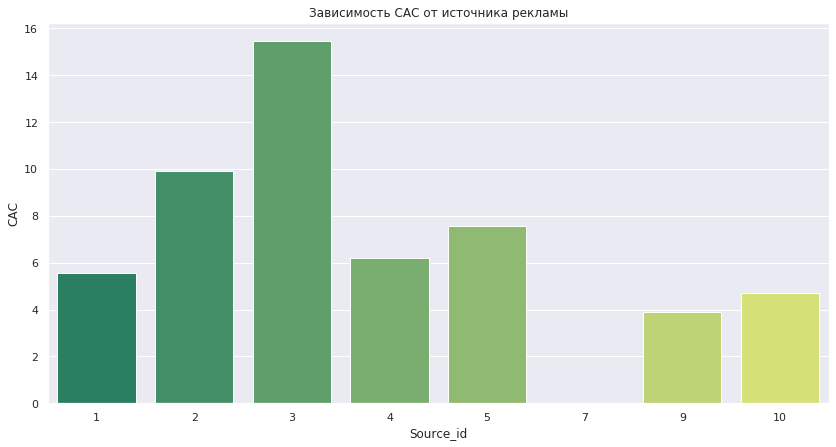

In [73]:
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'source_id', y = 'cac', data = costs_fin, palette = 'summer')
plt.xlabel('Source_id')
plt.ylabel('CAC')
plt.title('Зависимость CAC от источника рекламы');

Дополнительно сгруппируем расходы по месяцу.

In [74]:
#создадим сводную таблицу зависимости расходов на маркетинг от месяца
source_monthly_costs = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
source_monthly_costs.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Посмотрим CAC в динамике.

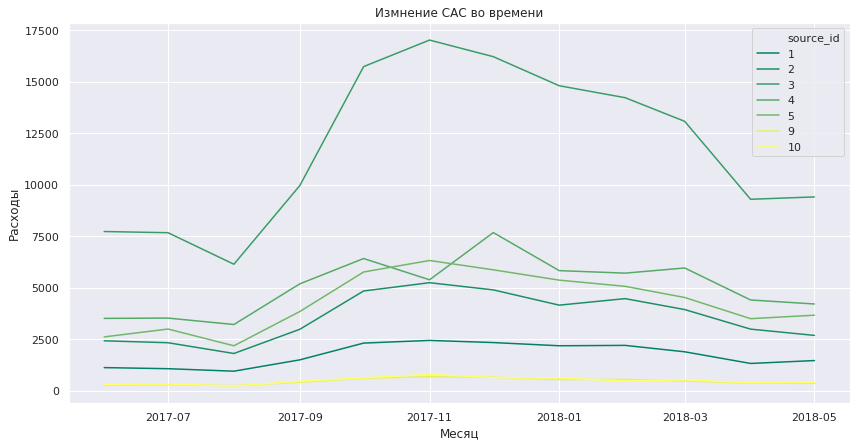

In [75]:
fig = plt.figure(figsize = (14, 7))
sns.lineplot(data = source_monthly_costs, x = 'month', y = 'costs', hue = 'source_id',
             palette = 'summer', legend = 'full')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Измнение CAC во времени');

Самая низкая стоимость привлечения клиента для источника под номером 1 и 10. Источник 3 самый дорогой, причем затраты на него со временем сильно увеличивались, видимо маркетологи выбрали его как самый перспективный. Далее проверим, насколько они оказались правы.

<b> Расчет показателя возврата инвестиций ROMI </b>

In [76]:
#объединим датафрейм report, полученный при расчете ltv, с датафреймом monthly_costs
report_new = pd.merge(report, monthly_costs, left_on = 'first_order_month', right_on = 'month')
#рассчитаем CAC для каждой когорты
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,order_month,uid,revenue_sum,buy_count,mean,avg_check,age,gp,ltv,month,costs,revenue,romi,cac
0,2017-06-01,2023,2017-06-01,2023,9557.49,2354,1.163618,4.06,0,9557.49,4.724414,2017-06-01,18015.0,9557.49,0.53053,8.905091
1,2017-06-01,2023,2017-07-01,61,981.82,177,2.901639,5.55,1,981.82,0.485329,2017-06-01,18015.0,9557.49,0.53053,8.905091
2,2017-06-01,2023,2017-08-01,50,885.34,174,3.480000,5.09,2,885.34,0.437637,2017-06-01,18015.0,9557.49,0.53053,8.905091
3,2017-06-01,2023,2017-09-01,54,1931.30,226,4.185185,8.55,3,1931.30,0.954671,2017-06-01,18015.0,9557.49,0.53053,8.905091
4,2017-06-01,2023,2017-10-01,88,2068.58,292,3.318182,7.08,4,2068.58,1.022531,2017-06-01,18015.0,9557.49,0.53053,8.905091


Выведем график зависимости ROMI от источника рекламы.

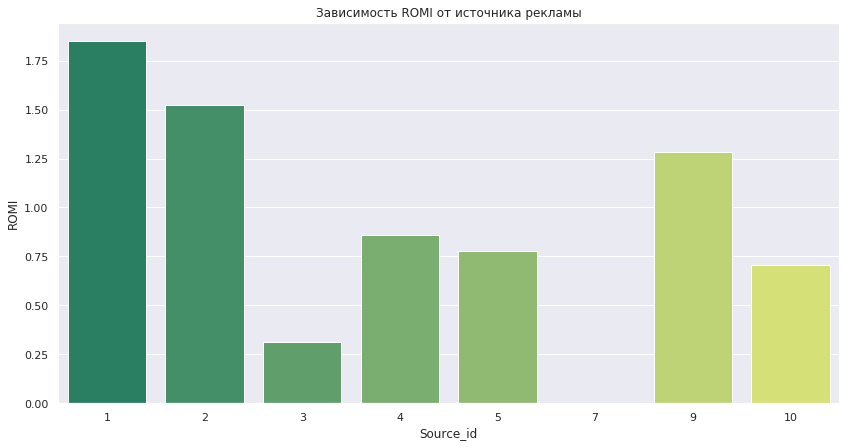

In [77]:
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'source_id', y = 'romi', data = costs_fin, palette = 'summer')
plt.xlabel('Source_id')
plt.ylabel('ROMI')
plt.title('Зависимость ROMI от источника рекламы');

В среднем окупается три источника рекламы: 1, 2, 9. Остальные можно признать нецелесообразными для вложений.

Cамым невыгодным является источник под номером 3, количество привлеченных клиентов по нему одно из самых высоких, количество, правда, не перерастает в качество. На данный момент самыми выгодными источниками являются 1, 2 и 9, разница между ltv и cac для них наибольшая.

Рассчитаем накопительный ROMI для каждой когорты.

In [78]:
#добавим столбец с ROMI для каждой когорты 
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

#выведем накопительный ROMI для каждой когорты
final_romi = output_romi.cumsum(axis=1).round(2)
final_romi

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вычислим среднее ROMI по длительности жизни.

In [79]:
#найдем средние значения куммулятивного ROMI по длительности жизни
mean_romi = pd.DataFrame(output_romi.cumsum(axis=1).mean(axis=0)).round(2)
mean_romi.columns = ['mean']
#транспонируем полученный датафрейм
mean_romi = mean_romi.T
#выведем результат на экран
mean_romi

age,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.54,0.58,0.63,0.72,0.78,0.86,0.9,0.97,1.05,0.96,1.09,1.33


In [80]:
#объединим полученные датафреймы
merged_romi = pd.concat([final_romi, mean_romi], axis = 0)
#выведем результат с заполненными пропусками на экран
merged_romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01 00:00:00,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01 00:00:00,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01 00:00:00,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01 00:00:00,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01 00:00:00,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01 00:00:00,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01 00:00:00,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01 00:00:00,0.46,0.49,0.5,0.51,,,,,,,,
2018-03-01 00:00:00,0.56,0.6,0.63,,,,,,,,,


Отобразим тепловую карту ROMI.

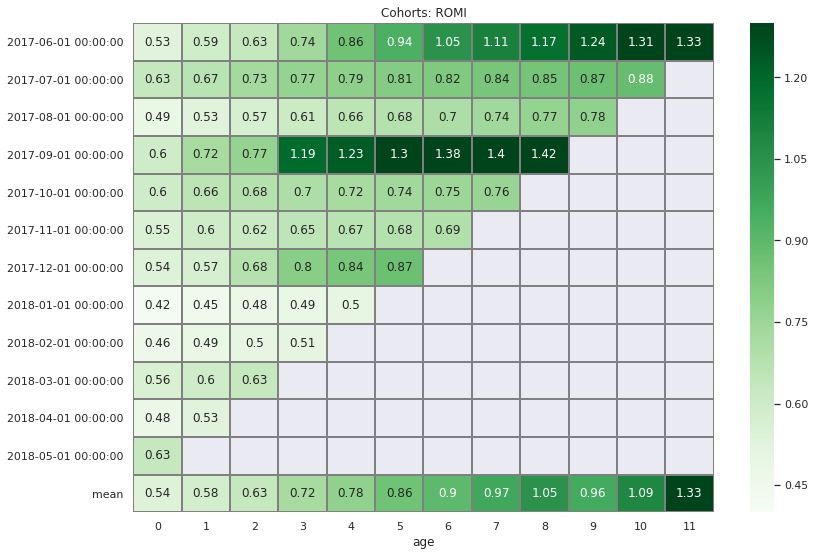

In [81]:
heatmap(merged_romi, 'Cohorts: ROMI', '2g', 0.4, 1.3)

За промежуток нашей выборки окупились две когорты. Быстрее всего окупилась когорта сентября 2017г. - за 4 месяца, первая когорта (июнь 2017г.) окупилась за 7 месяцев. Остальные когорты к маю 2018г. не окупились, но когорта декабря 2017г. близка к этому. <br>
Достаточно быстрая окупаемость первой когорты, возможно, зависит от того, что первые пользователи получили какие-то особенные условия, скидки или бонусы, позднее эти пользователи проявляют высокую лояльность к Афише. Вообще, можно заметить тенденцию к более высокому ROMI когорт начала каждого квартала (т.е. каждые 3 месяца).
В среднем же каждая когортка окупается на 8 месяц, но потом есть тенденция к падению окупаемости.

Теперь рассчитаем ROMI с разбивкой по типу источников рекламы, с которых впервые заходили пользователи.

In [82]:
def romi(name, title):
    
    ''' Функция для вывода таблицы ROMI и тепловой карты для различных рекламных источников'''
    
    #получим срез датафрейма user_device по рекламным источникам
    #остальные действия аналогичны произведенным при расчете ROMI для общих когорт
    user_src = users[users['source_id'] == name]
    costs_src = pd.DataFrame(user_src.groupby(['acquisition_month'])['acquisition_cost'].sum()).reset_index()
        
    first_orders_src = first_orders[first_orders['source_id'] == name]

    cohort_sizes_src = first_orders_src.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_src.columns = ['first_order_month', 'n_buyers']

    cohorts_src = first_orders_src.groupby(['first_order_month','order_month']).agg(
        {'uid': 'nunique', 'revenue':['sum', 'count']}).reset_index()
    cohorts_src.columns = ['first_order_month', 'order_month', 'uid', 'revenue_sum', 'buy_count']
    
    cohorts_src['age'] = (cohorts_src['order_month'] - cohorts_src['first_order_month']) / np.timedelta64(1, 'M')
    cohorts_src['age'] = cohorts_src['age'].round().astype('int')

    report_src = pd.merge(cohort_sizes_src, cohorts_src, on = 'first_order_month')
    margin_rate = 1
    report_src['gp'] = report_src['revenue_sum'] * margin_rate

    report_src['ltv'] = report_src['gp'] / report_src['n_buyers']
    report_new_romi = pd.merge(report_src, costs_src, left_on = 'first_order_month', right_on = 'acquisition_month')
    report_new_romi['cac'] = report_new_romi['acquisition_cost'] / report_new_romi['n_buyers']
    report_new_romi.head()

    output_cac_romi = report_new_romi.pivot_table(
            index='first_order_month', 
            values='cac', 
            aggfunc='mean')

    output_cac_romi.reset_index()

    report_new_romi['romi'] = report_new_romi['ltv'] / report_new_romi['cac']
    output_romi_src = report_new_romi.pivot_table(
            index='first_order_month', 
            columns='age', 
            values='romi', 
            aggfunc='mean')
    
    final_romi_src = output_romi_src.cumsum(axis=1).round(2)
    
    mean_romi_src = pd.DataFrame(output_romi_src.cumsum(axis=1).mean(axis=0)).round(2)
    mean_romi_src.columns = ['mean']
    mean_romi_src = mean_romi_src.T
    
    merged_romi_src = pd.concat([final_romi_src, mean_romi_src], axis = 0)
    
    #выведем на экран таблицу с накопительным ROMI и тепловую крату для этого датафрейма
    heatmap(merged_romi_src, title, '2g', 0.7, 6)

Вычислим ROMI для клиентов, пришедших с различных источников рекламы.

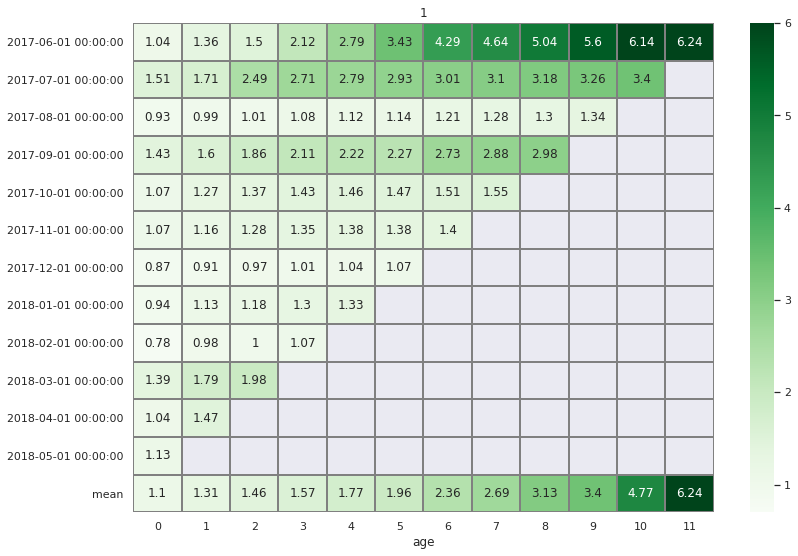

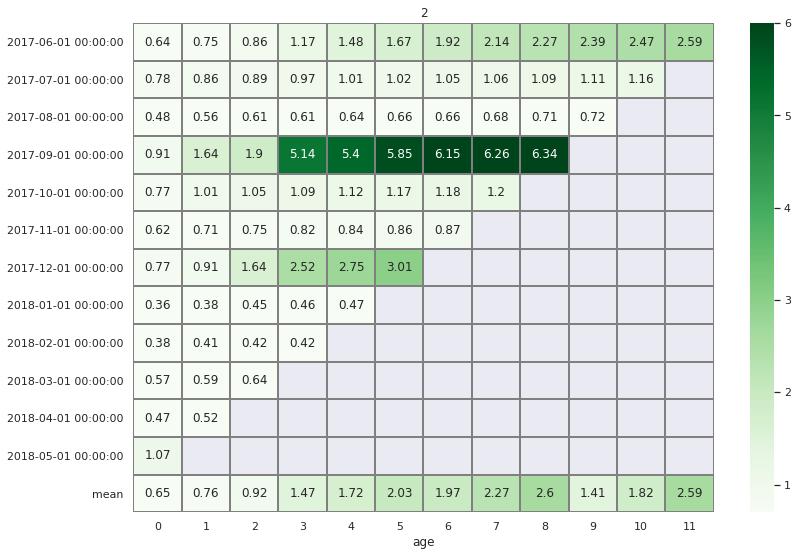

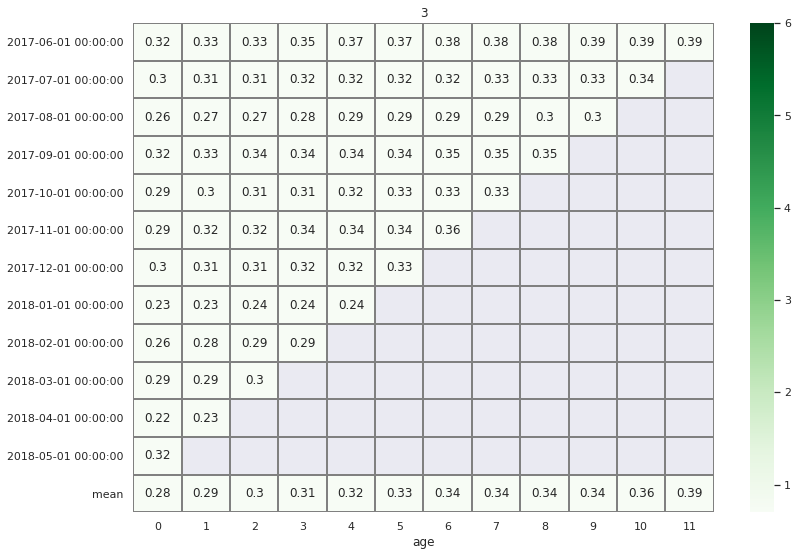

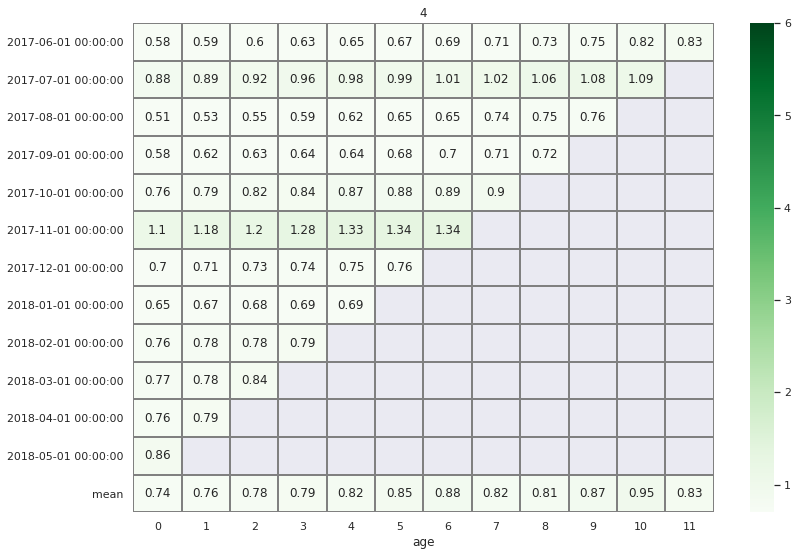

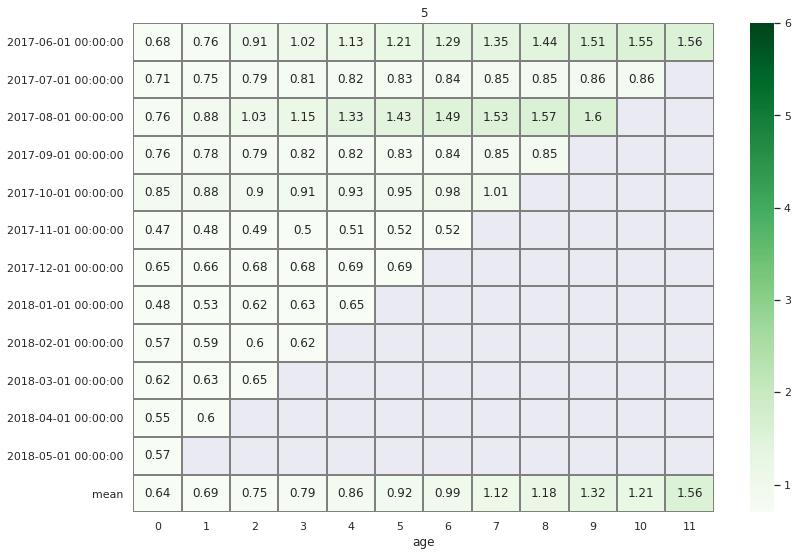

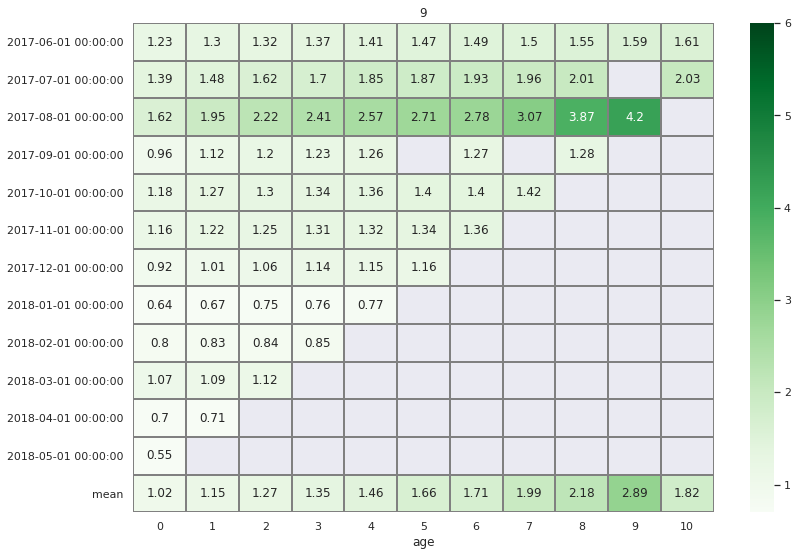

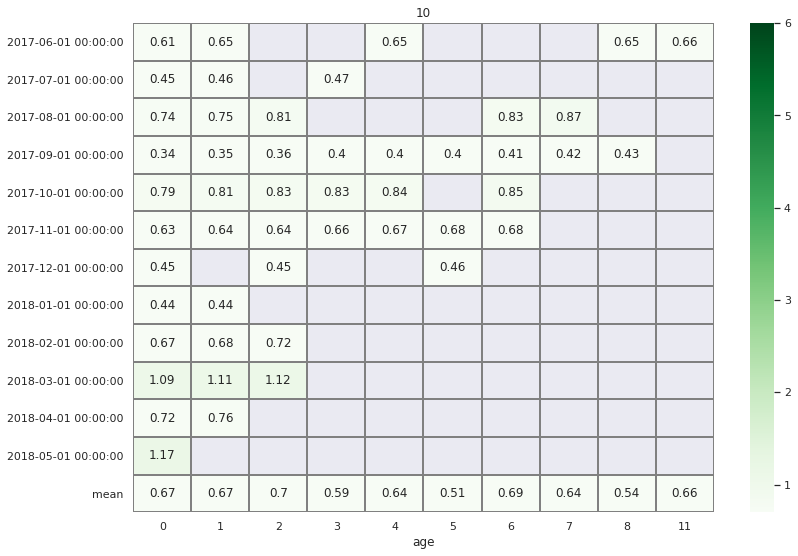

In [83]:
for name in source_costs['source_id']:
    romi(name, name)

Как и при общем расчете, выделяются 3 источника: 1, 2 и 9. При этом при когортном анализе стало очевидно, что второй источник обладает высоким средним ROMI из-за успешной сентябрьской когорты. Источник под номером 9 окупается быстрее (с первого месяца).
Заметно, что 9 и 10 источники используются нерегулярно. При этом в среднем 9 источник быстро выходит на окупаемость, думаю, стоит больше внимания уделить ему.

### Вывод

- Самыми низкими затратами на привлечение покупателей обладают 1 и 9 источники, стоит их рекомендовать маркетологам для дальнейшего развития.
- Когорта начала каждого сезона (июнь, сентябрь, декабрь) является самой выгодной и активной,  они окупаются быстрее других, думаю, это связано с каким-то бонусными программами и акциями, приуроченными к началу каждого сезона.
- За промежуток нашей выборки окупились две когорты. Быстрее всего окупилась когорта сентября 2017г. - за 4 месяца, первая когорта (июнь 2017г.) окупилась за 7 месяцев. Остальные когорты к маю 2018г. не окупились, но когорта декабря 2017г. близка к этому. 
- Одной из проблем является низкий ROMI пользователей с мобильными устройствами. Когорты таких клиентов не выходят на окупаемость даже через год. Стоит обратить внимание разрабаотчиков на мобильную версию приложения и сайта.

Более полные выводы - в общем выводе в конце работы.

### Шаг 3.  Общий вывод и рекомендации <a id='step3'></a>

Мной была проведена работа по исследованию анализа продуктов, продаж и маркетинговых затрат Яндекс.Афиши для оптимизации маркетинговых вложений. 

1. На предварительном этапе загружены исходные датафреймы, названия столбцов для удобства приведены к нижнему регистру, типы данных в столбцах с датами приведены к корректным.


2. 
    - В продуктовой части аналитики было рассчитано среднее количество посетителей сайта в день, неделю и месяц, рассчитан Sticky Factor. Месячный Sticky Factor оказался примерно равен 4%, что является довольно низким показателем. Возможно, маркетологам стоит лучше работать, использовать push-уведомления, рассылки, использовать какие-то накопительные бонусы и программы. Но также возможно, что тип услуг на сайте не пользуется регулярным спросом из-за специфики направления. 
    - Рассчитана метрика ASL (среднее время длительности сессии) - 300c, но при этом мода показывает, что большая часть пользователей проводит на сайте около минуты. Или быстро находят, что ищут, или не могут найти и теряют интерес. Стоит проверить этот показатель.
    - Коэффициент удержания клиентов Retention Rate достаточно низок, возможно, нужно поработать маркетологам. Также есть вероятность, что услуги сайта редко востребованы, и многие пользователи не нуждаются в них чаще, чем, к примеру, один раз в год.
    

3. 
    - Путем объединения (merge и join) и группировки исходных датафреймов методами groupby и pivot_table, получены сводные таблицы зависимости среднего кол-ва посещений и среднего чека клиента, а также пожизненная ценность клиента (LTV). 
    - Большее число пользователей начинает покупать в течение минуты после начала сессии. Возможно, что структура сайта очень удобна для клиента, или объем заказа достаточно мал. 
    - Кол-во покупок за период сильно зависит от когорты, как мы видим, самая "покупающая" - первая когорта. Видимо, как и в случае с Retention Rate, это обусловлено какими-то особыми условиями и бонусами, которые были предоставлены первым пользователям. Или же это эффект новизны. Почему бы не улучшить таким же образом показатели других когорт?
    - Чаще всего покупают пользователи первой когорты (июнь 2017), скорее всего это связано с какими-то бонусами или специальными программами для первых зарегистрировавшихся. Больше трех покупок в среднем на пользователя этой когорты, в то время, как по остальным когортам этот показатель - в районе 1,5-1,8.
    - Средний чек когорт начала сезона (июнь, сентяюрь, декабрь) заметно выше остальных когорт. С чем это связано, тружно сказать. Возможно, какие-то бонусные баллы или акции.
    - Из когорт с возрастом более 6 месяцев, наибольший средний LTV у декабрьской и сентябрьской когорт. Какие-то бонусы с начала сезона помогают вернуться и потратить больше денег. Думаю, что целесообразно таким же образом стимулировать пользователей и других когорт.
    - В целом, клиенты, пришедшие на сайт с компьютеров обладают более высоким LTV, чем пользователи мобильных устройств, независимо от когорты. Видимо, дает о себе знать большое удобство десктопной версии, возможно, и ее функционал. Как вариант, за большим монитором проще делать более масштабные в цене и количестве покупки.
    

4. 
    - Самыми низкими затратами на привлечение покупателей обладают 1 и 9 источники, стоит их рекомендовать маркетологам для дальнейшего развития.
    - За промежуток нашей выборки окупились две когорты. Быстрее всего окупилась когорта сентября 2017г. - за 4 месяца, первая когорта (июнь 2017г.) окупилась за 7 месяцев. Остальные когорты к маю 2018г. не окупились, но когорта декабря 2017г. близка к этому. 
    - Достаточно быстрая окупаемость первой когорты, возможно, зависит от того, что первые пользователи получили какие-то особенные условия, скидки или бонусы, позднее эти пользователи проявляют высокую лояльность к Афише. Вообще, можно заметить тенденцию к более высокому ROMI когорт начала каждого квартала (т.е. каждые 3 месяца). В среднем же каждая когортка окупается на 8 месяц. Можно порекомендовать маркетологам предложить схожие условия и программы для новых пользователей каждый месяц, не только в начале сезона, так как остальные когорты не выходят на окупаемость. Пока наш бизнес убыточен, судя по тенденции, прибыльным он пока не становится. 
    - Одной из проблем является низкий ROMI пользователей с мобильными устройствами. Когорты таких клиентов не выходят на окупаемость даже через год. Стоит обратить внимание разрабаотчиков на мобильную версию приложения и сайта. С дестктопной версией ситуация лучше, но тоже не столь радужная. В среднем, когорты окупаются к концу 5 месяца, но во многом это за счет когорт начала сезона и самой первой когорты. 
    - Самыми выгодными являюся 1,2 и 9 источники рекламы. Разница между LTV и CAC для них наибольшая, ROMI также высок. Можно рекомендовать тратить маркетологам больше денег на эти источники. Источник по номером 3 очень дорогой, обладает низким ROMI, но приносит довольно много клиентов. Возможно, стоит отказаться от него или оптимизировать затраты.
